# Lab 2

After Lab 1, you should be able to import data, be able to determine a few quick facts about that data, and articulate the purpose of unit testing. Today we going to extend on our work from last time. Our goals are to:
1. Use Travis for Continuous Integration
2. Use `pandas` to select parts of data, and 
3. Use `matplotlib`, `pandas`, and `seaborn` to make images.  

### Before starting...

A few questions before we begin:
* Do you need to `pull` anything? 
* Do you need to copy anything into a folder? 
* Are you in the right `env`ironment? 

<sub>These reminders will smaller and smaller as we get used to the flow of this course.</sub>

## Continuous integration with Travis

In Lab 1, we learned about unit testing. We were able to create and locally run our unit tests. Now we will shift to using Travis to continuously test our code against the unit tests. This rest of this section is based off instructions from [Part 5](https://bmcfee.github.io/ismir2018-oss-tutorial/tutorial/2018/08/12/part-5.html) of McFee and Kell's Open MIR Tutorial. 

For this part, I have created an assignment called `lab2-travis`. Just as you did for Lab 0, please click on [this link](https://classroom.github.com/a/qXz4EMwu) and create your own local repository. In this repo, you will find three files:
1. `.gitignore`,
2. `requirements.txt`, and 
3. `.travis.yml`. 
This second hidden file "tells the Travis servers what to do with your code - in our case, just run the tests" says [McFee and Kell](https://bmcfee.github.io/ismir2018-oss-tutorial/tutorial/2018/08/12/part-5.html). 

Add your two python files from lab 1 (not the jupyter notebooks) and the data file to this directory. Commit your changes. 

Now we need to trace your repository on Travis:
1. Visit https://travis-ci.org/profile/<your-github-user-name>. You will list of repositories, and `lab2-travis` will not be there. 
2. All the repos for this class, including `lab2-travis`, are private. Right below your github name, you will see **Repositories** and a note that reads "We're only showing your public repositories. You can find your private projects on travis-ci.com ." Click the travis-ci.com link. 
3. You should now see a panel on the left side that has "My Repositories" and "Running (#/#)" at the top. Click on the "Running" link, you should see yellow text and your repo. 
    
Travis uses color to tell you want is happening:    
<font color='yellow'>**Yellow**</font> means that Travis is thinking   
<font color='red'>**Red**</font> means that either the build or the tests have failed   
<font color='green'>**Green**</font> means that the build and the tests have worked!    

For Travis to "build" things correctly, you will need to have both `requirements.txt` and `.travis.yml`. The later has three parts. As [McFee and Kell](https://bmcfee.github.io/ismir2018-oss-tutorial/tutorial/2018/08/12/part-5.html) summarize "The `install` block handles the gruntwork of installing everything, and the `script` block is what Travis runs. We currently just run `pytest`." The `requirements.txt` file adds the packages that we need in our python environment. 

Check out [Part 5](https://bmcfee.github.io/ismir2018-oss-tutorial/tutorial/2018/08/12/part-5.html) of McFee and Kell's Open MIR Tutorial for more tips and especially the "Gotchas" note. 

For homework 1, you will need to submit green boxes showing that you have correctly linked your repo to Travis and that your tests pass. 

### Preparing to code today

We need an extra package today: `seaborn`. Please use `conda` to add this to your environment. 

In [38]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Selecting subsets with `pandas`

In Lab 1, we learned about data frame structure within `pandas` and for class today, you read about some of the functionalities of `pandas`. Today, we will practice various kinds of slicing and how we can create new dataframes from previous ones.  

Let us start by importing the Forest Fires dataset from Lab 0 and reminding ourselves of what the first 5 rows look like. Add the `forestfire` file to the directory that you are using to work on Lab 2. 

In [47]:
ffire = pd.read_csv("forestfires.csv", sep=',')
ffire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Here we have a small snapshot of our data. Before moving on, what do you think the **bold** means? (Make a few notes below)

In `pandas` we can select slices of our data either by row or by column using either the names or counters. 

### Selecting by Row

The two most common ways to access rows are by using `.loc` and `.iloc`, which stand for [_location_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [_index location_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html), respectively. 

In this data, the names of the row indices are the same as the counter. So we will find that we can access each row in _nearly_ identical ways. Note that this is quite _**unusual**_. 

The general format for `loc` and `iloc` is row information first, followed by column selections (if desired). Try the below examples and note 1) how they are different and 2) what the arguments are:

In [ ]:
ffire.loc[2]

In [ ]:
ffire.loc[2,'month']

In [ ]:
ffire.loc[[0,2,5]]

In [ ]:
ffire.loc[0:5,'month']

In [ ]:
ffire.loc[0:5,['month', 'wind', 'day']]

In [ ]:
ffire.loc[[0,2,5],['month', 'wind', 'day']]

**Note**!!!! `.loc` does not slice in the usual manner for `python`. Notice that the last index is _included_. This is very unusual. 

So far we have just used `.loc`. Repeat all the above examples using `.iloc`; do they all work? 

In [ ]:
# Code Block for you!



The big difference between `.loc` and `.iloc` is that the first expects the index _names_ for both the rows and the columns, while the second expects the index _numbers_. So to make `.iloc` work, we need to have the index number for each column. Try again below:


In [ ]:
# Code Block for you!



### Selecting by Column

Extending the ideas from before, we can extend the ideas from above using `.loc` and `.iloc`, to get the full columns (ie. all the rows). How might you do this? Experiment with the two below blocks: 

In [ ]:
ffire.loc[?????,['month', 'wind', 'day']]

In [ ]:
ffire.iloc[?????,[2,10,3]]

Another way to access the columns uses `[]` to do our slicing:

In [ ]:
ffire[['month', 'wind', 'day']]

### Your turn

Experiment with selecting different parts of the forest fire dataset in the below code block. 

Also, note that this is just the beginning of what we can do with `pandas`. 

In [ ]:
# Code Block for you!



## Getting started with `matplotlib`

For this course, most of our visualizations will be built using `matplotlib`. There is another language called MATLAB which can be used for scientific computing (of largely numerical data). MATLAB is optimized for matrix and vector operations, but unlike python, it is not freely available. Along with its powerful computational tools, MATLAB can create data-based images. As the transition away from MATLAB and towards python began, there was a need for all the functionality of MATLAB to exist within python. So the creation and popularity of `matplotlib` makes a lot of historical sense. 

In this section, we will just begin to scratch the surface of what `matplotlib` can do. This section of the lab is based on Chapter 9 of _Python for Data Analysis_ applied to the [forest fires dataset](http://archive.ics.uci.edu/ml/datasets/Forest+Fires). 

### Importing `matplotlib`

You might notice three new lines in our import block.
1. `%matplotlib inline` allows our plots to show up inline within our jupyter notebook    
   Note - This **must** come before importing _matplotlib_
2. `import matplotlib.pyplot as plt` imports the plotting part of _matplotlib_
3. `import seaborn as sns` imports _seaborn_ for our plots using _pandas_

In [2]:
# Import forest fire data as a numpy array

ffire_np = np.genfromtxt("forestfires.csv",delimiter=",",skip_header=1)

### First plot

In `jupyter` we have to do everything for our plots in one code block. So I will be adding comments within the next code block to explain each line. 

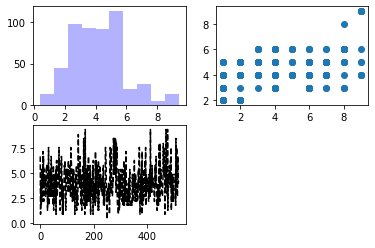

In [45]:
# Create the figure
# In MATLAB, as in `matplotlib`, plots exist within Figure objects.
fig = plt.figure()

# Create each of the subplots in their locations
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# Plot the wind column in order by the rows
# Q1: Where is this plot placed? 
# Q2: Would it stay there if you changed the order of the 'ax' lines?
plt.plot(ffire_np[:,10], "k--")

# Create a histogram of the wind information
_ = ax1.hist(ffire_np[:,10], bins=10, color="b", alpha = 0.3)

# Create a scatter plot of the X and Y columns
ax2.scatter(ffire_np[:,0], ffire_np[:,1])

There is a lot that `matplotlib` can do, as seen in the [matplotlib gallery](https://matplotlib.org/gallery.html). But like MATLAB and `numpy`, it is limited to largely numerical data. For example, notice that we had to count to where the 'wind' column was to access it. 

If we want additional functionality, we are going to make use of some `pandas` functionality as well as the `seaborn` package. 

## Quick plots with `pandas`

We can make a few quick plots on our `pandas` data frames. Notice that these are built on top of `matplotlib`. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114edcb38>]],
      dtype=object)

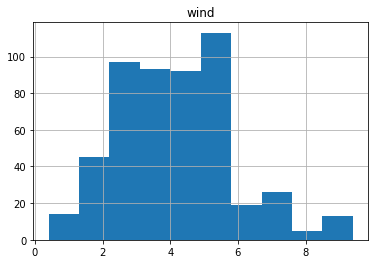

In [56]:
ffire.hist('wind',bins = 10)

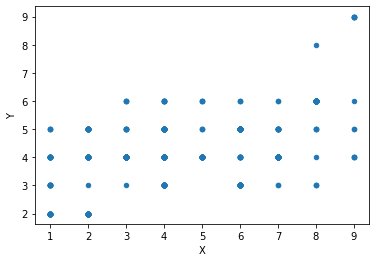

In [55]:
ffire.plot('X','Y','scatter')

## More control with `seaborn`

The above plots are great first images, but we may want to generate more complex plots with layers. This is where we reach for `seaborn` which is built on top of `matplotlib` (similar to how `pandas` is built on `numpy`).

In this section, I am referencing the [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) helpfiles for `seaborn`.

#### Resources consulted to build this lab:

1. [Part 5](https://bmcfee.github.io/ismir2018-oss-tutorial/tutorial/2018/08/12/part-5.html) of McFee and Kell's Open MIR Tutorial
2. Wikipedia about [hidden files](https://en.wikipedia.org/wiki/Hidden_file_and_hidden_directory)
3. [Ignoring Files and Directories in Git with .gitignore](https://www.jamescoyle.net/how-to/1094-ignoring-files-in-git-with-gitignore)
4. Stackoverflow question about ipynb checkpoints: [How to git ignore ipython notebook checkpoints anywhere in repository](https://stackoverflow.com/questions/35916658/how-to-git-ignore-ipython-notebook-checkpoints-anywhere-in-repository)
5. [Selecting Subsets of Data in Pandas: Part 1](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c)
6. [Using matplotlib in jupyter notebooks — comparing methods and some tips [Python]](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1)
7. [04.00-Introduction-To-Matplotlib.ipynb](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)
8. [plot in pandas](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)
9. [seaborn scatterplot helpfile](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
10. [seaborn stripplot helpfile](https://seaborn.pydata.org/generated/seaborn.stripplot.html) 